# **Revealing Patterns within 'Catch the Pink Flamingo' Game Data**



Exploratory Data Analysis (EDA) for the "Catch the Pink Flamingo" game involves utilizing Spark in Python to thoroughly examine and comprehend the provided dataset, enabling the extraction of meaningful insights. The dataset consists of various files, each offering unique information about different aspects of the game.

**ad-clicks.csv:**

Database of clicks on ads.
Fields include timestamp, txId, userSessionId, teamId, userId, adId, and adCategory.


**buy-clicks.csv:**

Database of purchases.
Fields include timestamp, txId, userSessionId, team, userId, buyId, and price.
game-clicks.csv:

Record of each click a user performs during the game.
Fields include timestamp, clickId, userId, userSessionId, isHit, teamId, and teamLevel.

**level-events.csv:**

Record of each level event for a team.
Fields include timestamp, eventId, teamId, teamLevel, and eventType.
**team-assignments.csv:**

Record of each time a user joins a team.
Fields include timestamp, team, userId, and assignmentId.

**team.csv:**

Record of each team in the game.
Fields include teamId, name, teamCreationTime, teamEndTime, strength, and currentLevel.

**user-session.csv:**

Record of each session a user plays.
Fields include timestamp, userSessionId, userId, teamId, assignmentId, sessionType, teamLevel, and platformType.

**users.csv:**

Database of game users.







Firstly, the command !apt-get install openjdk-8-jdk-headless installs the OpenJDK 8, headless version, which is crucial for Java-based applications such as Apache Spark.

Next, !wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz downloads the Spark distribution file, and !tar xf spark-3.2.1-bin-hadoop2.7.tgz extracts its contents.

In [ ]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u362-ga-0ubuntu1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-14 10:01:12--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  27.4MB/s    in 10s     

2023-05-14 10:01:23 (25.5 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



Following that, the Python script utilizes the os module to set environment variables for Java and Spark home directories. This ensures that the system recognizes the Java Development Kit and Spark installation paths.


The findspark library is then used to locate the Spark installation and initialize it for use with PySpark. The SparkSession is configured with essential parameters, such as the master URL, application name, and Spark UI port.


Finally, the Spark session is created, allowing users to leverage the distributed computing capabilities of Apache Spark for their data cleaning tasks. The specified master URL "local" indicates that Spark will run in local mode on the current machine.

In [ ]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("DataCleaningApp")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark

Upon loading the dataset, the subsequent sections of code are dedicated to meticulously checking for missing values and duplicates. For each step in the exploratory data analysis (EDA), the code is thoughtfully annotated, providing a comprehensive understanding of the procedures applied.

In [ ]:
#loadining dataset and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import year, month, date_format ,hour , dayofweek
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

ad_clicks_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/ad-clicks.csv")

ad_clicks_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in ad_clicks_df.columns]).show()

df_duplicates = ad_clicks_df.groupBy(ad_clicks_df.columns).count().filter(col("count")>1)
df_duplicates.show()


+---------+----+-------------+------+------+----+----------+
|timestamp|txId|userSessionId|teamId|userId|adId|adCategory|
+---------+----+-------------+------+------+----+----------+
|        0|   0|            0|     0|     0|   0|         0|
+---------+----+-------------+------+------+----+----------+

+---------+----+-------------+------+------+----+----------+-----+
|timestamp|txId|userSessionId|teamId|userId|adId|adCategory|count|
+---------+----+-------------+------+------+----+----------+-----+
+---------+----+-------------+------+------+----+----------+-----+



<ipython-input-28-696a9eb0be3b>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlGnBu')
<ipython-input-28-696a9eb0be3b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ad_clicks_count_pd["adCategory"])


<Figure size 640x480 with 0 Axes>

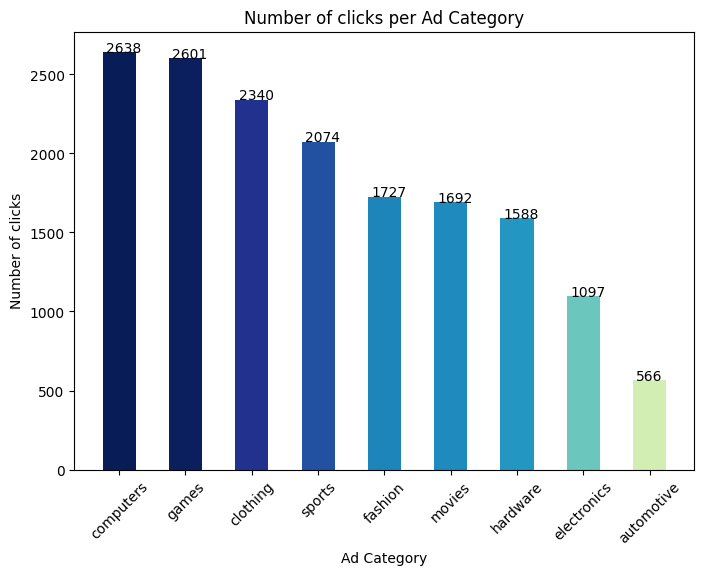

In [ ]:
#Number of clicks per ad category/type
plt.subplots_adjust(bottom=0.15)
#Bar chart showing the number of clicks per category/type of ad

# group by the ad category/type and count the number of clicks
ad_clicks_count = ad_clicks_df.groupBy("adCategory").agg(count("*").alias("clicks"))

ad_clicks_count_pd = ad_clicks_count.toPandas()

ad_clicks_count_pd = ad_clicks_count_pd.sort_values(by='clicks', ascending=False)

cmap = plt.cm.get_cmap('YlGnBu')

fig, ax = plt.subplots(figsize=(8, 6))

# plot the bar chart with colored bars and adjusted space between bars
ax.bar(ad_clicks_count_pd["adCategory"], ad_clicks_count_pd["clicks"],
       color=cmap(ad_clicks_count_pd["clicks"] / max(ad_clicks_count_pd["clicks"])),
       width=0.5)

ax.set_xticklabels(ad_clicks_count_pd["adCategory"])


for i, v in enumerate(ad_clicks_count_pd["clicks"]):
    ax.text(i-0.2, v+0.5, str(v))

ax.set_xlabel("Ad Category")
ax.set_ylabel("Number of clicks")
ax.set_title("Number of clicks per Ad Category")
plt.xticks(rotation=45)

# adjust the space between the x-axis tick labels and the bottom of the plot
plt.subplots_adjust(bottom=0.15)

plt.show()

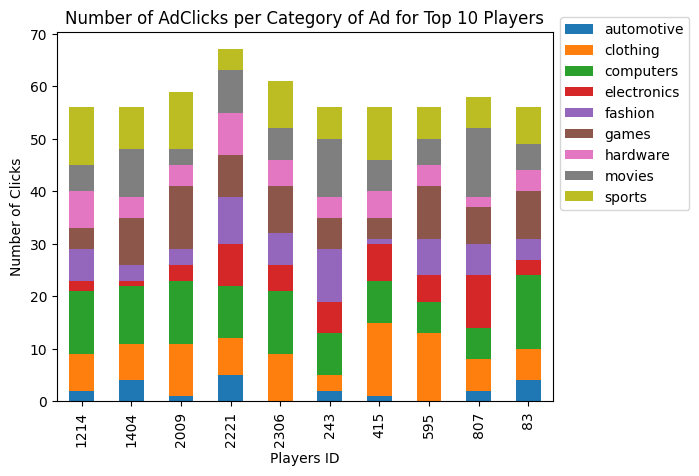

In [ ]:
#Stacked bar chart showing the number of clicks per category/type of ad top 10 user
# group by user ID and ad category/type, and count the number of clicks
clicks_counts = ad_clicks_df.groupBy("userId", "adCategory").agg(count("*").alias("clicks"))

# group by user ID and count the total number of clicks per user
clicks_per_user = clicks_counts.groupBy("userId").sum("clicks").withColumnRenamed("sum(clicks)", "total_clicks")

# select the top 10 users
top_10_users = clicks_per_user.orderBy("total_clicks", ascending=False).limit(10).select("userId")

# filtering,  keep only the clicks of the top 10 users
clicks_top_10_users = ad_clicks_df.join(top_10_users, "userId", "inner")

# count the number of clicksof top 10 users
clicks_user_category= clicks_top_10_users.groupBy("userId", "adCategory").agg(count("*").alias("clicks"))

clicks_user_pd = clicks_user_category.toPandas()

clicks_user_pd.pivot(index="userId", columns="adCategory", values="clicks").plot(kind="bar", stacked=True)

plt.title("Number of AdClicks per Category of Ad for Top 10 Players")
plt.xlabel("Players ID")
plt.ylabel("Number of Clicks")


plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

plt.show()


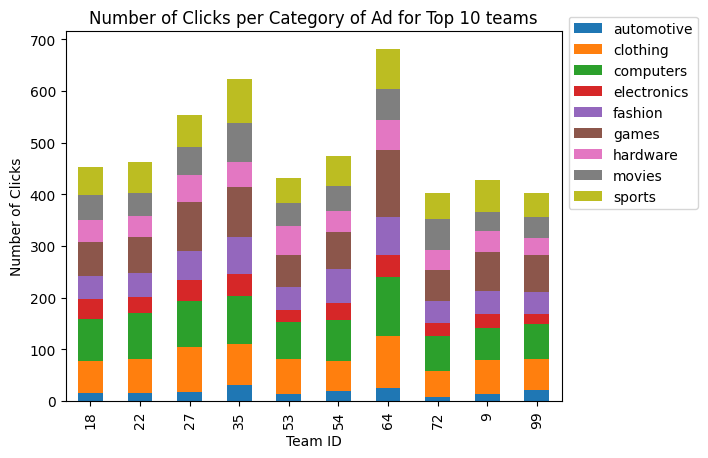

In [ ]:
# group by team ID and ad category, and count the number of clicks
clicks_count_team = ad_clicks_df.groupBy("teamId", "adCategory").agg(count("*").alias("clicks"))

# group by team ID and count the total number of clicks per team
clicks_per_team = clicks_count_team.groupBy("teamId").sum("clicks").withColumnRenamed("sum(clicks)", "total_clicks")

# select the top 10 teams
top_10_team = clicks_per_team.orderBy("total_clicks", ascending=False).limit(10).select("teamId")

# filter, keep only the clicks of the top 10 teams
clicks_top_10_team = ad_clicks_df.join(top_10_team, "teamId", "inner")

# count the number of clicks of top 10 teams
clicks_team_category = clicks_top_10_team.groupBy("teamId", "adCategory").agg(count("*").alias("clicks"))

clicks_team_pd = clicks_team_category.toPandas()

# create stacked bar chart
clicks_team_pd.pivot(index="teamId", columns="adCategory", values="clicks").plot(kind="bar", stacked=True)

plt.title("Number of Clicks per Category of Ad for Top 10 teams")
plt.xlabel("Team ID")
plt.ylabel("Number of Clicks")

plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))


plt.show()


<ipython-input-27-9937a0208569>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  clicks_matrix = clicks_pd.pivot("hour", "day_of_week", "clicks")


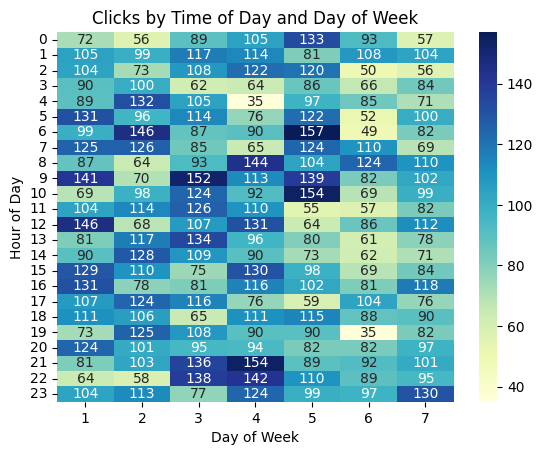

In [ ]:
#Clicks by Time of Day and Day of Week
# convert timestamp string to timestamp datatype
ad_clicks_df = ad_clicks_df.withColumn("timestamp", ad_clicks_df["timestamp"].cast("timestamp"))

# extract hour and day of week from timestamp
ad_clicks_df = ad_clicks_df.withColumn("hour", hour(ad_clicks_df["timestamp"]))
ad_clicks_df = ad_clicks_df.withColumn("day_of_week", dayofweek(ad_clicks_df["timestamp"]))

# group by hour and day of week and count the number of clicks
clicks_hour_day = ad_clicks_df.groupBy("hour", "day_of_week").agg(count("*").alias("clicks"))

clicks_pd = clicks_hour_day.toPandas()

# pivot the data to create a matrix of clicks by hour and day of week
clicks_matrix = clicks_pd.pivot("hour", "day_of_week", "clicks")

sns.heatmap(clicks_matrix, cmap="YlGnBu", annot=True, fmt="d")

plt.title("Clicks by Time of Day and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")

plt.show()

In [ ]:
#loadining buy_click dataset and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col,sum,collect_list, struct,first
from pyspark.sql.functions import year, month, to_date
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

buy_clicks_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/buy-clicks.csv")

buy_clicks_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in buy_clicks_df.columns]).show()

df_duplicates = buy_clicks_df.groupBy(buy_clicks_df.columns).count().filter(col("count")>1)
df_duplicates.show()


+---------+----+-------------+----+------+-----+-----+
|timestamp|txId|userSessionId|team|userId|buyId|price|
+---------+----+-------------+----+------+-----+-----+
|        0|   0|            0|   0|     0|    0|    0|
+---------+----+-------------+----+------+-----+-----+

+---------+----+-------------+----+------+-----+-----+-----+
|timestamp|txId|userSessionId|team|userId|buyId|price|count|
+---------+----+-------------+----+------+-----+-----+-----+
+---------+----+-------------+----+------+-----+-----+-----+



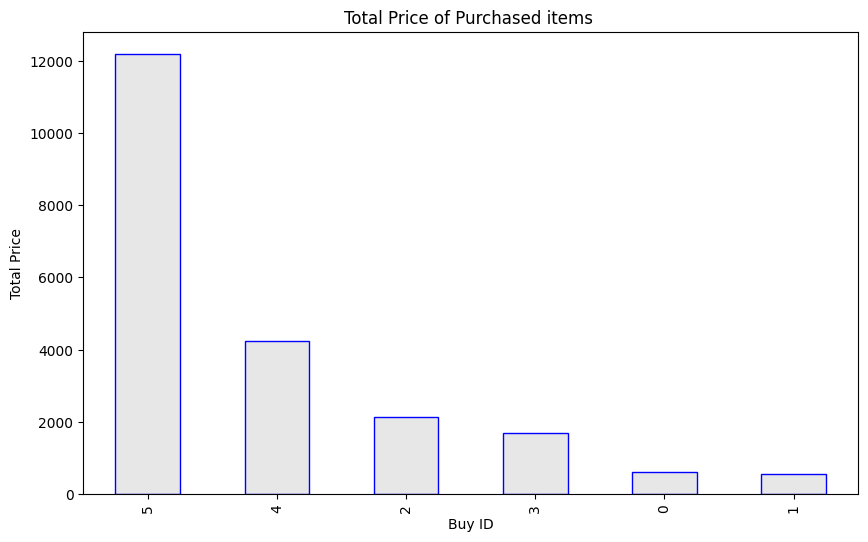

In [ ]:
# group by buy ID and calculate the total price for each ID
buy_total_price = buy_clicks_df.groupBy("buyId").agg(sum("price").alias("total_price"))

buy_total_price = buy_total_price.orderBy(desc("total_price"))

buy_total_price_pd = buy_total_price.toPandas()
buy_total_price_pd.plot(kind="bar", x="buyId", y="total_price", figsize=(10, 6), legend=None, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xlabel("Buy ID")
plt.ylabel("Total Price")
plt.title("Total Price of Purchased items ")
plt.show()



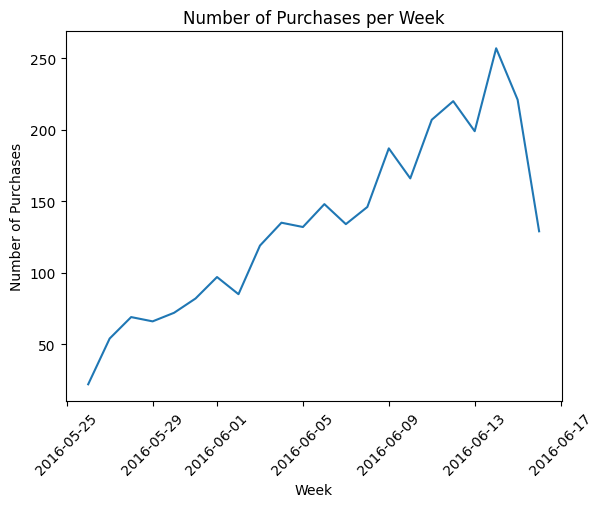

In [ ]:
#A line chart showing the number of purchases per week
# convert timestamp column to date format
buy_clicks_df = buy_clicks_df.withColumn("date", to_date(buy_clicks_df.timestamp))

# group by date and count the number of purchases per week
weekly_purchases = buy_clicks_df.groupBy("date").agg(count("*").alias("weekly_purchases")).orderBy("date")

weekly_purchases_pd = weekly_purchases.toPandas()

plt.plot(weekly_purchases_pd["date"], weekly_purchases_pd["weekly_purchases"])

plt.title("Number of Purchases per Week")
plt.xlabel("Week")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)


plt.show()


+----+-------------+-------------+------------------------+
|team|num_purchases|total_revenue|avg_revenue_per_purchase|
+----+-------------+-------------+------------------------+
|  27|          101|        880.0|       8.712871287128714|
|  54|           89|        777.0|       8.730337078651685|
|  35|           94|        710.0|       7.553191489361702|
|  64|          100|        693.0|                    6.93|
|  53|           86|        677.0|       7.872093023255814|
|  66|           79|        647.0|       8.189873417721518|
|  59|           61|        644.0|      10.557377049180328|
|  11|           64|        587.0|                9.171875|
|  97|           76|        549.0|       7.223684210526316|
|  22|           86|        535.0|        6.22093023255814|
|  72|           88|        534.0|       6.068181818181818|
|   9|           98|        513.0|        5.23469387755102|
|  20|           60|        458.0|       7.633333333333334|
|  94|           43|        450.0|      

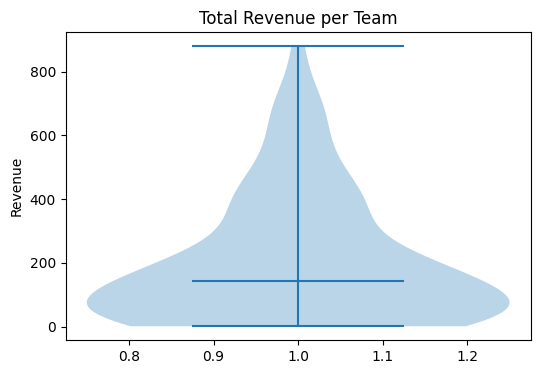

In [ ]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

#Total Revenue per Team
# group by user ID and count the number of purchases
purchases_per_user = buy_clicks_df.groupBy("team").agg(count("*").alias("num_purchases"))

# calculate the total revenue generated by each user
revenue_per_user = buy_clicks_df.groupBy("team").agg(sum(col("price").cast("double")).alias("total_revenue"))

# join the two dataframes on the user ID
user_analysis = purchases_per_user.join(revenue_per_user, "team")

# calculate the average revenue per purchase
user_analysis = user_analysis.withColumn("avg_revenue_per_purchase", user_analysis["total_revenue"] / user_analysis["num_purchases"])

# sort the dataframe by total revenue in descending order
user_analysis = user_analysis.sort("total_revenue", ascending=False)

user_analysis.show()

# Select the relevant columns for the plot
data_1 = user_analysis.select(col("total_revenue").alias("Revenue"))

data_pd_1 = data_1.toPandas()

# Create the violin plot using matplotlib
plt.figure(figsize=(6, 4))
plt.violinplot(data_pd_1["Revenue"], showmeans=False, showmedians=True)
plt.title("Total Revenue per Team")
plt.ylabel("Revenue")
plt.show()



In [ ]:
#loadining game-clicks dataset  and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import year, month, date_format
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

game_click_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/game-clicks.csv")

game_click_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in game_click_df.columns]).show()

df_duplicates = game_click_df.groupBy(game_click_df.columns).count().filter(col("count")>1)
df_duplicates.show()

+---------+-------+------+-------------+-----+------+---------+
|timestamp|clickId|userId|userSessionId|isHit|teamId|teamLevel|
+---------+-------+------+-------------+-----+------+---------+
|        0|      0|     0|            0|    0|     0|        0|
+---------+-------+------+-------------+-----+------+---------+

+---------+-------+------+-------------+-----+------+---------+-----+
|timestamp|clickId|userId|userSessionId|isHit|teamId|teamLevel|count|
+---------+-------+------+-------------+-----+------+---------+-----+
+---------+-------+------+-------------+-----+------+---------+-----+



<ipython-input-107-610fe30174ad>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('coolwarm', len(clicks_level_pd))


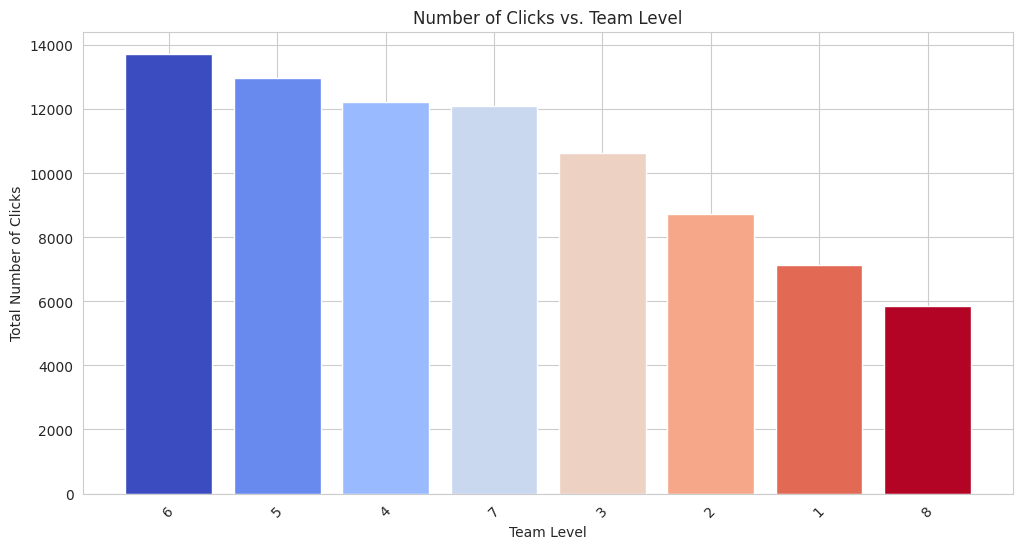

Correlation between teamLevel and numClicks:  0.18005031636163635


In [ ]:
from pyspark.sql.functions import sum


# Convert the 'isHit' column to an integer type
game_click_df = game_click_df.withColumn('isHit', game_click_df['isHit'].cast('int'))

# Group the DataFrame by team level and sum the number of clicks
clicks_level = game_click_df.groupBy('teamLevel').agg(sum('isHit').alias('numClicks'))

clicks_level_pd = clicks_level.toPandas()

# Sort the resulting DataFrame in descending order based on the number of clicks
clicks_level = clicks_level.orderBy('numClicks', ascending=False)

colormap = plt.cm.get_cmap('coolwarm', len(clicks_level_pd))

# Create a bar chart with descending order based on the number of clicks
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(clicks_level.select('teamLevel').rdd.flatMap(lambda x: x).collect(), clicks_level.select('numClicks').rdd.flatMap(lambda x: x).collect(), color=colormap(np.arange(len(clicks_level_pd))))
plt.xticks(rotation=45)
plt.xlabel('Team Level')
plt.ylabel('Total Number of Clicks')
plt.title('Number of Clicks vs. Team Level')
plt.show()


clicks_level = clicks_level.withColumn("teamLevel", col("teamLevel").cast("int"))
clicks_level = clicks_level.withColumn("numClicks", col("numClicks").cast("int"))

# calculate the correlation between price and purchaseId
correlation = clicks_level.corr("teamLevel", "numClicks")
# print the correlation value
print("Correlation between teamLevel and numClicks: ", correlation)

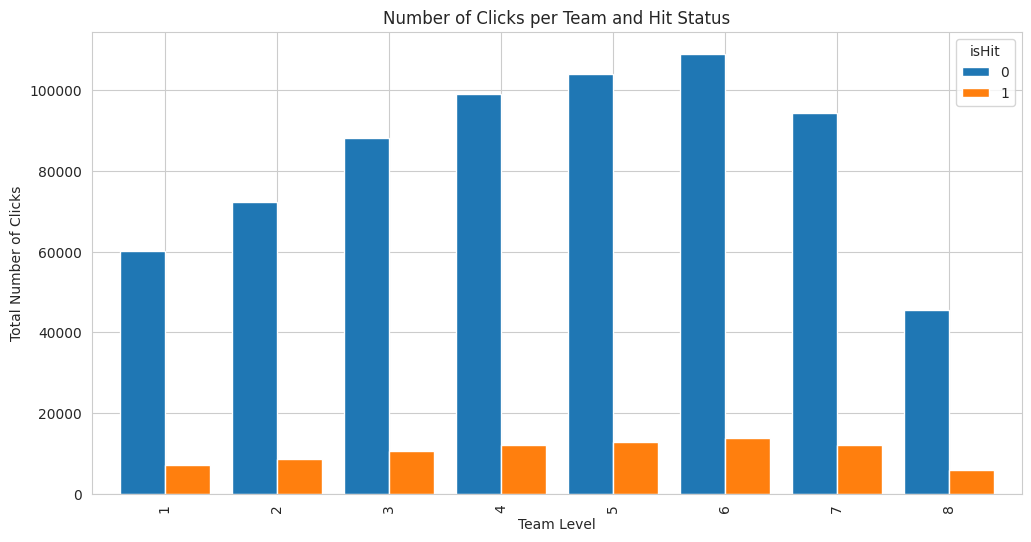

In [ ]:
# Group the DataFrame by team level and whether the click was on a flamingo or missed the flamingo, and sum the number of clicks for each group
clicks_by_team_and_hit = game_click_df.groupBy('teamLevel', 'isHit').agg(count('isHit').alias('numClicks'))

clicks_team_hit_pd = clicks_by_team_and_hit.toPandas()

clicks_team_hit_pd.pivot(index='teamLevel', columns='isHit', values='numClicks').plot(kind='bar', width=0.8, figsize=(12,6))

plt.xlabel('Team Level')
plt.ylabel('Total Number of Clicks')
plt.title('Number of Clicks per Team and Hit Status')
plt.show()


In [ ]:
#loadining game-clicks dataset  and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col,size
from pyspark.sql.functions import year, month, date_format
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

level_event_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/level-events.csv")

level_event_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in level_event_df.columns]).show()

df_duplicates = level_event_df.groupBy(level_event_df.columns).count().filter(col("count")>1)
df_duplicates.show()

+---------+-------+------+---------+---------+
|timestamp|eventId|teamId|teamLevel|eventType|
+---------+-------+------+---------+---------+
|        0|      0|     0|        0|        0|
+---------+-------+------+---------+---------+

+---------+-------+------+---------+---------+-----+
|timestamp|eventId|teamId|teamLevel|eventType|count|
+---------+-------+------+---------+---------+-----+
+---------+-------+------+---------+---------+-----+



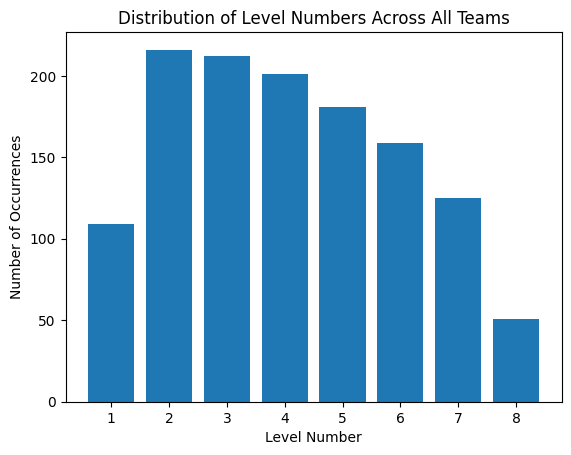

In [ ]:
#A bar chart showing the distribution of level numbers across all teams.
# Group the DataFrame by level and count the number of occurrences of each level
levels_count = level_event_df.groupBy("teamLevel").agg(count("*").alias("count")).orderBy("teamLevel")

levels_count_pd = levels_count.toPandas()

plt.bar(levels_count_pd["teamLevel"], levels_count_pd["count"])

plt.xlabel("Level Number")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Level Numbers Across All Teams")

plt.show()


In [ ]:
#loadining game-clicks dataset  and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import year, month, date_format
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

team_assignments_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/team-assignments.csv")

team_assignments_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in team_assignments_df.columns]).show()

df_duplicates = team_assignments_df.groupBy(team_assignments_df.columns).count().filter(col("count")>1)
df_duplicates.show()

+---------+----+------+------------+
|timestamp|team|userId|assignmentId|
+---------+----+------+------------+
|        0|   0|     0|           0|
+---------+----+------+------------+

+---------+----+------+------------+-----+
|timestamp|team|userId|assignmentId|count|
+---------+----+------+------------+-----+
+---------+----+------+------------+-----+



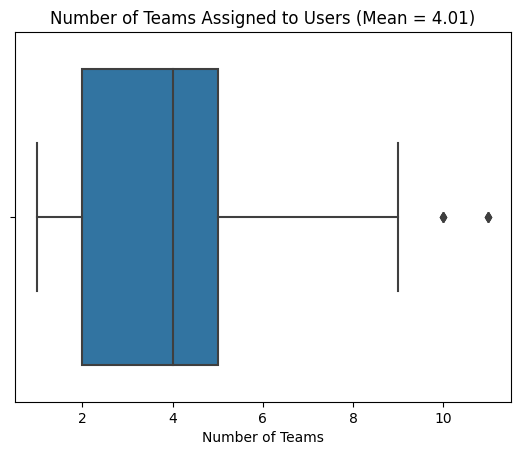

In [ ]:
import pyspark.sql.functions as F
import seaborn as sns

# Group the team assignment DataFrame by user ID and count the number of teams each user has been assigned to
users_assigned_teams = team_assignments_df.groupBy('userId').agg(F.countDistinct('team').alias('num_teams'))

# Calculate the mean number of teams each user has been assigned to
mean_teams = users_assigned_teams.agg(F.mean('num_teams')).collect()[0][0]

# Create a box plot of the number of teams each user has been assigned to
sns.boxplot(x=users_assigned_teams.toPandas()['num_teams'])
plt.title(f"Number of Teams Assigned to Users (Mean = {mean_teams:.2f})")
plt.xlabel("Number of Teams")
plt.show()


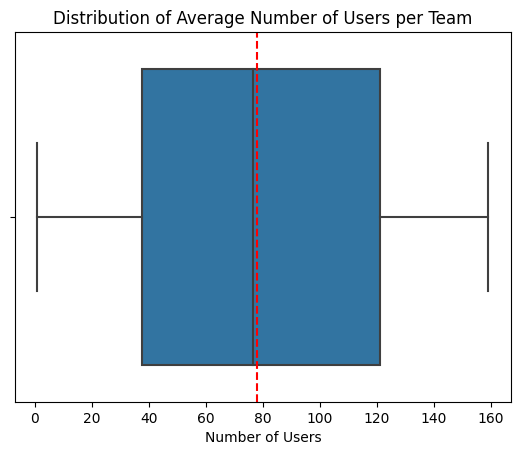

In [ ]:
import pandas as pd
import seaborn as sns

# Group the team assignment DataFrame by team ID and count the number of unique users per team
users_per_team = team_assignments_df.groupBy('team').agg({'userId': 'count'}).withColumnRenamed('count(userId)', 'num_users')

# Compute the average number of users per team
avg_users_per_team = users_per_team.agg({'num_users': 'avg'}).collect()[0][0]

users_per_team_pd = users_per_team.toPandas()

sns.boxplot(x='num_users', data=users_per_team_pd)
plt.axvline(x=avg_users_per_team, color='r', linestyle='--')
plt.title('Distribution of Average Number of Users per Team')
plt.xlabel('Number of Users')
plt.show()


In [ ]:
#loadining dataset and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import year, month, date_format
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

team_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/team.csv")

team_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in team_df.columns]).show()

df_duplicates = team_df.groupBy(team_df.columns).count().filter(col("count")>1)
df_duplicates.show()

+------+----+----------------+-----------+--------+------------+
|teamId|name|teamCreationTime|teamEndTime|strength|currentLevel|
+------+----+----------------+-----------+--------+------------+
|     0|   0|               0|          0|       0|           0|
+------+----+----------------+-----------+--------+------------+

+------+----+----------------+-----------+--------+------------+-----+
|teamId|name|teamCreationTime|teamEndTime|strength|currentLevel|count|
+------+----+----------------+-----------+--------+------------+-----+
+------+----+----------------+-----------+--------+------------+-----+



In [ ]:
#loadining dataset and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import year, month, date_format
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

user_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/users.csv")

user_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in user_df.columns]).show()

df_duplicates = user_df.groupBy(user_df.columns).count().filter(col("count")>1)
df_duplicates.show()

+---------+------+----+-------+---+-------+
|timestamp|userId|nick|twitter|dob|country|
+---------+------+----+-------+---+-------+
|        0|     0|   0|      0|  0|      0|
+---------+------+----+-------+---+-------+

+---------+------+----+-------+---+-------+-----+
|timestamp|userId|nick|twitter|dob|country|count|
+---------+------+----+-------+---+-------+-----+
+---------+------+----+-------+---+-------+-----+



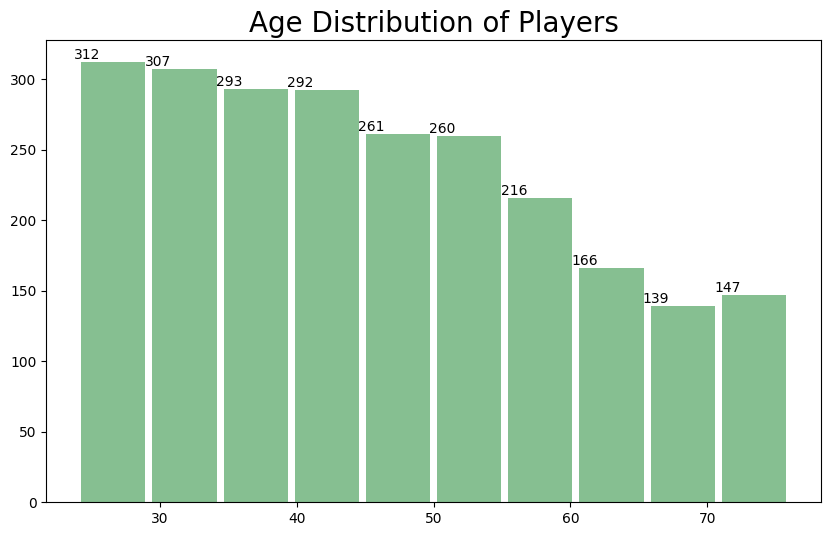

In [ ]:
from pyspark.sql.functions import year, to_date, current_date
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date of birth column to a date data type
user_df = user_df.withColumn("DOB_date", to_date(user_df["dob"], "yyyy-MM-dd"))

#create new column age of players
df_users = user_df.withColumn('age', (F.months_between(current_date(), F.col('dob')) / 12).cast('int'))

age_counts_pd = df_users.toPandas()

fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = ax.hist(age_counts_pd['age'], bins=10, color='#86bf91', rwidth=0.9)

for i in range(len(patches)):
    ax.text(patches[i].get_x()+0.4, patches[i].get_height()+5, int(n[i]), ha='center', va='center', fontsize=10)

ax.set_title("Age Distribution of Players", fontsize=20)

plt.show()


In [ ]:
#loadining dataset and checkin missing values and dulplicate
from pyspark.sql.functions import isnan, when, count, col,isnan
from pyspark.sql.functions import year, month, date_format
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


user_session_df = spark.read.format("csv").option("header", "true").load("/content/sample_data/user-session.csv")

#user_session_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in user_df.columns]).show()

df_duplicates = user_session_df.groupBy(user_session_df.columns).count().filter(col("count")>1)
df_duplicates.show()

+---------+-------------+------+------+------------+-----------+---------+------------+-----+
|timestamp|userSessionId|userId|teamId|assignmentId|sessionType|teamLevel|platformType|count|
+---------+-------------+------+------+------------+-----------+---------+------------+-----+
+---------+-------------+------+------+------------+-----------+---------+------------+-----+



+------------+------+
|platformType| count|
+------------+------+
|      iphone|1937.0|
|     android|1637.0|
|       linux| 252.0|
|         mac| 179.0|
|     windows| 620.0|
+------------+------+



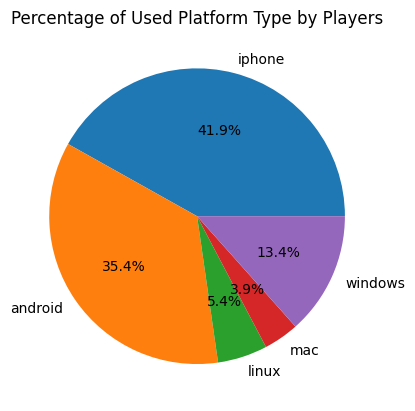

In [ ]:
from pyspark.sql.functions import round

# Create a DataFrame with the count of users per platform
platform_counts = user_session_df.groupBy("platformType").count()

platform_counts = platform_counts.withColumn("count", col("count") / 2)

platform_counts.show()

# Calculate the percentage of users per platform
total_users = platform_counts.agg({"count": "sum"}).collect()[0][0]

platform_counts = platform_counts.withColumn("% of Users", round(platform_counts["count"]/total_users*100, 2))

platform_counts_pd = platform_counts.toPandas()

plt.pie(platform_counts_pd["% of Users"], labels=platform_counts_pd["platformType"], autopct="%1.1f%%")
plt.title("Percentage of Used Platform Type by Players")

plt.show()


<ipython-input-141-2e01bea4cbef>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20b')


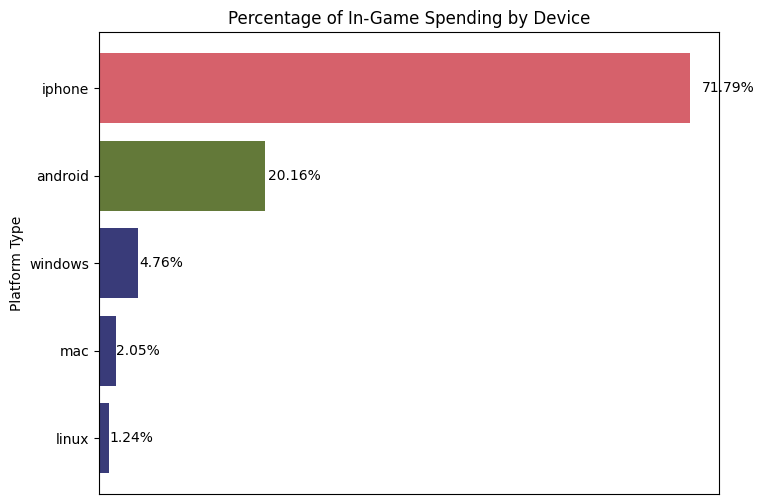

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum, col

buy_clicks_df = buy_clicks_df.withColumnRenamed("team", "teamId")


# join ad_click and user_session datasets by userSessionId, teamId, and userId columns
joined_df = buy_clicks_df.join(user_session_df, ['userSessionId', 'teamId', 'userId'])

# calculate the total revenue generated by each device
revenue_per_device = joined_df.groupBy('platformType').agg(sum(col('price').cast('double')).alias('total_spending'))

# calculate the total revenue generated by all devices
total_revenue = revenue_per_device.groupBy().sum('total_spending').collect()[0][0]

# calculate the percentage of revenue generated by each device
revenue_percentage = revenue_per_device.withColumn('percentage', (col('total_spending')/total_revenue)*100)

# sort the dataframe by percentage in descending order
revenue_percentage = revenue_percentage.sort('percentage', ascending=True)

pandas_df = revenue_percentage.toPandas()

color_map = plt.cm.get_cmap('tab20b')

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.barh(pandas_df["platformType"], pandas_df["percentage"], color=color_map(pandas_df["percentage"]/100))


for bar in bars:
    width = bar.get_width()
    ax.text(width*1.02, bar.get_y()+bar.get_height()/2, f'{width:.2f}%', ha='left', va='center')

ax.set_xlabel('Percentage')
ax.set_ylabel('Platform Type')
ax.set_title('Percentage of In-Game Spending by Device')

ax.axes.get_xaxis().set_visible(False)

plt.show()

+------------+----------+
|platformType|clickCount|
+------------+----------+
|      iphone|     10968|
|     android|      9632|
|       linux|      1718|
|         mac|       846|
|     windows|      3860|
+------------+----------+



<ipython-input-142-9a77e6e9f1ab>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20c')


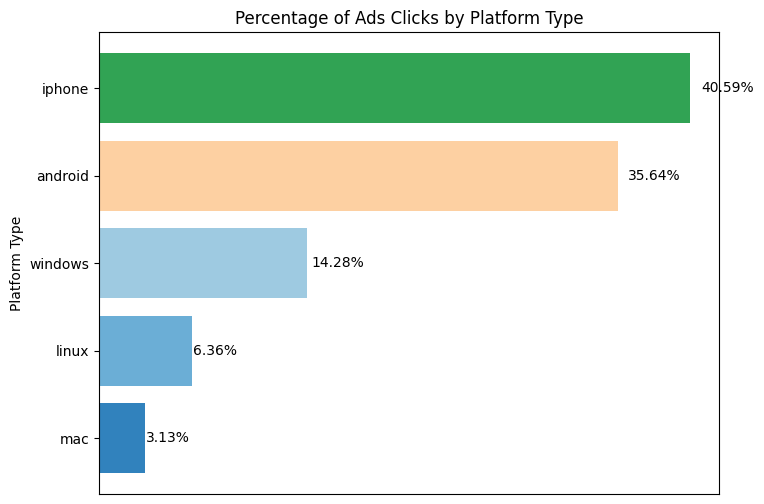

In [ ]:
from pyspark.sql.functions import col

# join ad_click and user_session datasets by userSessionId, teamId, and userId columns
joined_df = ad_clicks_df.join(user_session_df, ['userSessionId', 'teamId', 'userId'])

# count the number of clicks per platform type
click_count = joined_df.groupBy('platformType').count().withColumnRenamed('count', 'clickCount')
click_count.show()

# sort the dataframe by click count in descending order
click_count = click_count.sort('clickCount', ascending=True)

# calculate the percentage of clicks for each platform type
total_clicks = click_count.agg({'clickCount': 'sum'}).collect()[0][0]
click_count = click_count.withColumn('clickPercentage', col('clickCount')/total_clicks*100)

pandas_df = click_count.toPandas()

color_map = plt.cm.get_cmap('tab20c')

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.barh(pandas_df["platformType"], pandas_df["clickPercentage"], color=color_map(pandas_df["clickPercentage"]/100))


# add the percentage values to the right of each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width*1.02, bar.get_y()+bar.get_height()/2, f'{width:.2f}%', ha='left', va='center')

ax.set_xlabel('Percentage')
ax.set_ylabel('Platform Type')
ax.set_title('Percentage of Ads Clicks by Platform Type')

ax.axes.get_xaxis().set_visible(False)

plt.show()


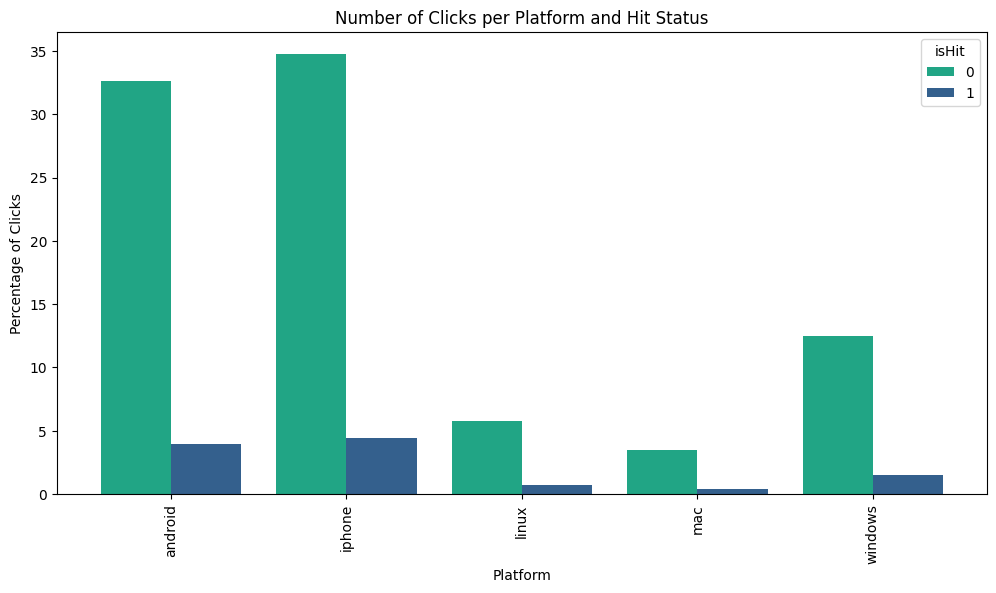

In [ ]:
# Join the user_session and game_click datasets
joined_df = user_session_df.join(game_click_df, ["userId", "userSessionId", "teamId", "teamLevel"])


platform_hits = joined_df.groupBy('platformType', 'isHit').agg(count('isHit').alias('hit_count'))


# sort the dataframe by click count in descending order
platform_hits = platform_hits.sort('hit_count', ascending=True)

# calculate the percentage of clicks for each platform type
total_clicks = platform_hits.agg({'hit_count': 'sum'}).collect()[0][0]
platform_hits = platform_hits.withColumn('hitPercentage', col('hit_count')/total_clicks*100)

platform_hits_pd = platform_hits.toPandas()

platform_hits_pd.pivot(index='platformType', columns='isHit', values='hitPercentage').plot(kind='bar', width=0.8, figsize=(12,6),color=color_map(platform_hits_pd["hitPercentage"]))

plt.xlabel('Platform')
plt.ylabel('Percentage of Clicks')
plt.title('Number of Clicks per Platform and Hit Status')
plt.show()



Correlation coefficient between strength and price: -0.20031298250302307


<ipython-input-179-ea05f81b7cfb>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


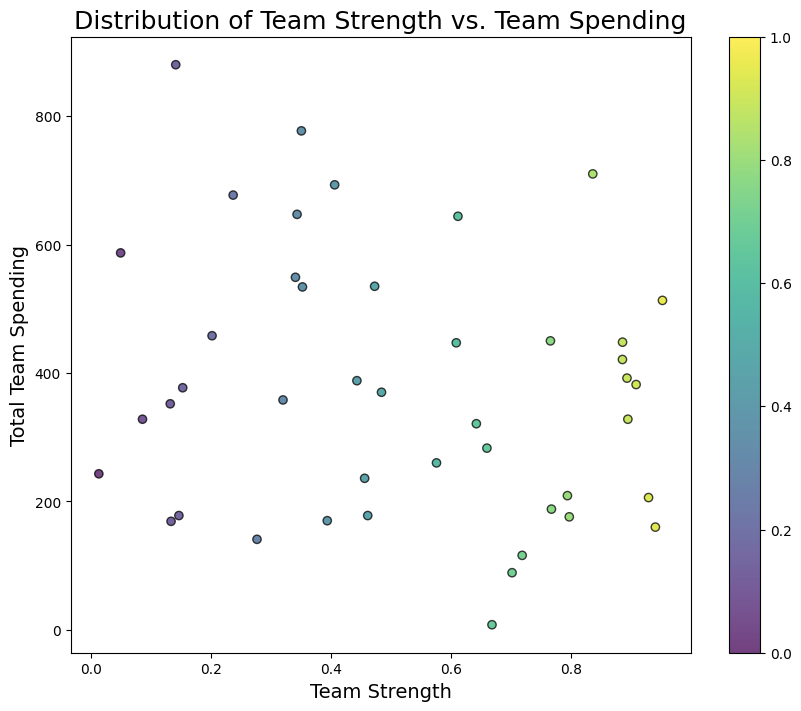

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum, min, max,corr

buy_clicks_df=buy_clicks_df.withColumnRenamed("team","teamId")


# Join the datasets on the team ID column
joined_df = team_df.join(buy_clicks_df, "teamId")

# Calculate the total spending per team
team_spending = joined_df.groupBy("strength", "teamId").agg(sum("price")).withColumnRenamed("sum(price)", "totalSpending")

# Calculate the correlation coefficient between strength and price
correlation = team_spending.select(corr("totalSpending", "strength")).first()[0]
print("Correlation coefficient between strength and price:", correlation)


# Plot a scatter plot to show the distribution of team strength against ad clicks
fig, ax = plt.subplots(figsize=(10, 8))
x = np.array(team_spending.select("strength").rdd.flatMap(lambda x: x).collect(), dtype=float)
y = team_spending.select("totalSpending").rdd.flatMap(lambda x: x).collect()

ax.set_xlabel("Team Strength", fontsize=14)
ax.set_ylabel("Total Team Spending", fontsize=14)
ax.set_title("Distribution of Team Strength vs. Team Spending", fontsize=18)

# Define the color map
cmap = cm.get_cmap('viridis')
colors = cmap(x)

plt.colorbar(ax.scatter(x, y, c=colors, edgecolor='black', linewidth=1, alpha=0.75))
plt.show()

Correlation coefficient between strength and totalClicks: -0.007247701536543132


<ipython-input-180-ab520127c787>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


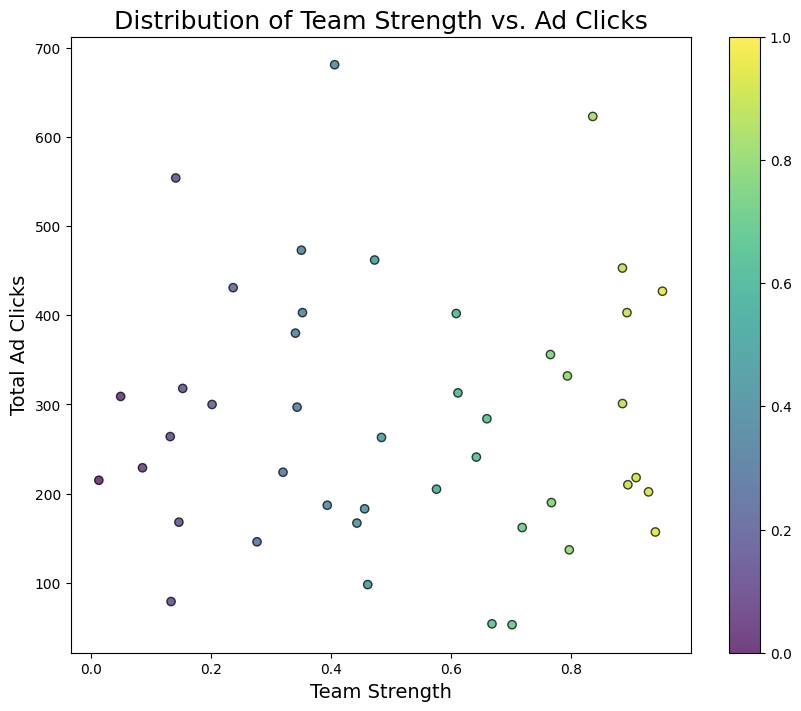

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Join the datasets on the team ID column
joined_df = team_df.join(ad_clicks_df, "teamId")

# Calculate the total ad clicks per team
team_clicks = joined_df.groupBy("strength", "teamId").agg(count("adId")).withColumnRenamed("count(adId)", "totalClicks")

# Calculate the correlation coefficient between strength and price
correlation = team_clicks.select(corr("strength", "totalClicks")).first()[0]
print("Correlation coefficient between strength and totalClicks:", correlation)

# Plot a scatter plot to show the distribution of team strength against ad clicks
fig, ax = plt.subplots(figsize=(10, 8))
x = np.array(team_clicks.select("strength").rdd.flatMap(lambda x: x).collect(), dtype=float)
y = team_clicks.select("totalClicks").rdd.flatMap(lambda x: x).collect()

ax.set_xlabel("Team Strength", fontsize=14)
ax.set_ylabel("Total Ad Clicks", fontsize=14)
ax.set_title("Distribution of Team Strength vs. Ad Clicks", fontsize=18)

# Define the color map
cmap = cm.get_cmap('viridis')
colors = cmap(x)

plt.colorbar(ax.scatter(x, y, c=colors, edgecolor='black', linewidth=1, alpha=0.75))
plt.show()
